# Time Series Analysis in Astronomy
As you must be aware that several phenomena, be it on the  small scale such as a spring or on the astronomical scale such as revolution, are periodic and thus give rise to time domain astronomy. In this notebook, we will see how the period of a given sets of observations is determined.
## Fourier Transforms
<a href="https://en.wikipedia.org/wiki/Fourier_transform">Fourier transform</a> is a mathematical technique which is loved by physicists and engineers alike thereby cringing out mathematicians. In simple words, Fourier transform takes a function depending on one variable to a domain where it is dependent on another variable. If a function is time dependent, then a Fourier transform would take it from the time domain to the frequency domain. If you perform a Fourier transform on the function in frequency domain, it will come back to time domain. You may watch this amazing 3B1B <a href="https://www.youtube.com/watch?v=spUNpyF58BY">video</a> for a better understanding of Fourier transform.
<p align="centre">
<img src="assets/FT.jpg" width="400">
</p>
Consider a function of time $f(t)$, then its Fourier transform is $F(\nu)$ where $\nu$ is the frequency.
Fourier transform can be continuos or discrete. Since we do not have a explicit function but some discrete values, we perform discrete Fourier transform or DFT. DFT is implemented through the FFT (Fast Fourier Transform) algorithm using the `numpy.fft` module. Let's see, how is it actually done.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

First, let's generate a few periodic signals (yes, sine waves) of known frequencies and create a mixed signal by superposing them.

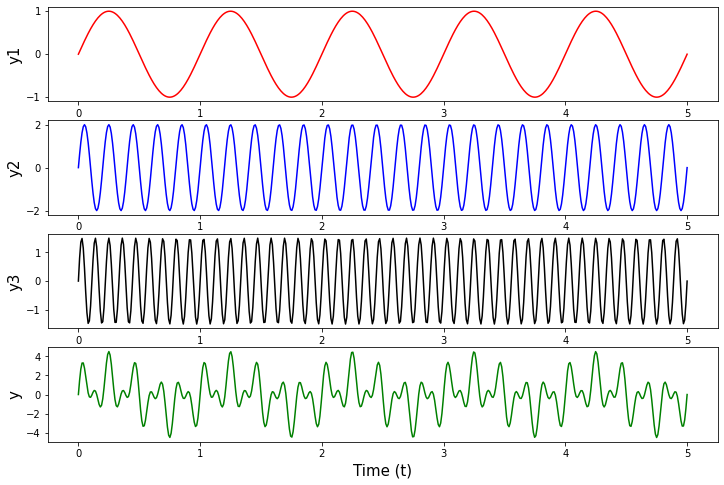

In [2]:
t=np.linspace(0,5,500)

#Designate the frequencies
f1=1
f2=5
f3=9

#Construct the sine waves
y1=np.sin(2*np.pi*f1*t)
y2=2*np.sin(2*np.pi*f2*t)
y3=1.5*np.sin(2*np.pi*f3*t)

#Superposed sine wave
y=y1+y2+y3

#Let;s plot
plt.figure(figsize=(12,8))
plt.subplot(4, 1, 1)
plt.plot(t,y1,'r')
plt.ylabel("y1",size=15)
plt.subplot(4, 1, 2)
plt.plot(t,y2,'b')
plt.ylabel("y2",size=15)
plt.subplot(4, 1, 3)
plt.plot(t,y3,'k')
plt.ylabel("y3",size=15)
plt.subplot(4, 1, 4)
plt.plot(t,y,'g')
plt.xlabel("Time (t)",size=15)
plt.ylabel("y",size=15)
plt.yticks([-4,-2,0,2,4])
plt.show()

Now, that we have the mixed signal $y$, we try to resolve the frequencies comprising the signal. Currently, we have $y(t)$ ie $y$ is in the time domain. We Fourier transform $y$ so as to get into the domain where we will be able to clearly segregate the frequencies. We can use either of the functions `np.fft.fft` or `np.fft.rfft`. Both of them perform discrete Fourier transform but the former is generally used for data with complex values and the latter is used for data with real values. If you use `np.fft.fft` for real valued data, the obtained output is symmetric. `np.fft.rfft` simply discards one half of the output due to symmetry.

In [3]:
#Perform the FFT, since we are using the whole array y of size 1000, this will be called a 1000-point FFT
power=np.fft.rfft(y)
#power here is simply an array of complex numbers containing the information about frequencies and amplitudes, you may print power to see the array

The power array that we obtained above simply contains the contributions of each frequencies. To visualize the output let us first generate the frequency bins using the `np.fft.rfftfreq` function. It takes two arguments `n` and `d` as the input. `n` here is the sample length, that is, n-point FFT. `d` is the sampling space which is the inverse of the sampling rate. Now what is sampling rate? It is the number of data points that we record per unit time. In our above example we took `t=np.linspace(0,5,500)`, so in a window of 5 units of time we sampled 500 data points, so in one unit of time we took 100 data points and hence the sampling rate would be 100 points per unit time. You may go through the documentation to see how the frequency bins are generated,

In [4]:
#Generate frequency bins.
freq=np.fft.rfftfreq(len(y),0.01) #rfftfreq generates (n/2)+1 frequency bins (the other half are omitted due to the symmetry property)
print(freq.shape)

(251,)


It's time to visualize the data, in other words, plot the Fourier <a href="https://en.wikipedia.org/wiki/Spectral_density">power spectrum</a>.

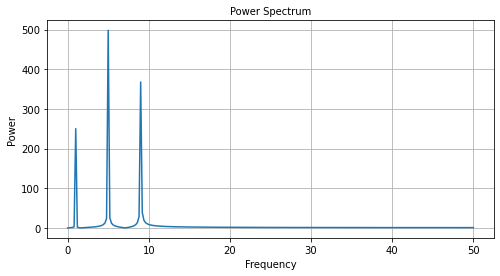

In [5]:
#Visualize the output
plt.figure(figsize=(8,4))
plt.plot(freq,np.abs(power)) #We simply need relative contribution, so we take the aboslute values of the complex numbers
plt.xlabel("Frequency",size=10)
plt.ylabel("Power",size=10)
plt.title("Power Spectrum",size=10)
plt.grid()
plt.show()

I guess you noticed the three spikes would be corresponding to the three frequencies we used above. Let's extract the frequencies. From the figure we can simply see that all the three spikes have magnitude much larger than zero and the rest are almost zero. Let's filter them out those three frequencies. We can simply pick up the frequencies with magnitude larger than say 100 or 200, not 300 because as you can see in the plot, we would get only two frequencies.

In [6]:
indices=np.where(np.abs(power)>200) #Gives the indices where the power is more than 200
filtered_freq=freq[indices]
print(filtered_freq)

[1. 5. 9.]


Viola! We obtained our frequencies f1, f2 and f3, namely, 1,5 and 9. In time domain Astronomy, we are mostly concerned with the frequencies and not the magnitudes. Numpy also offers an inverse FFT function just to travel backwwards. Let's see what that inverse function does.

(500,)


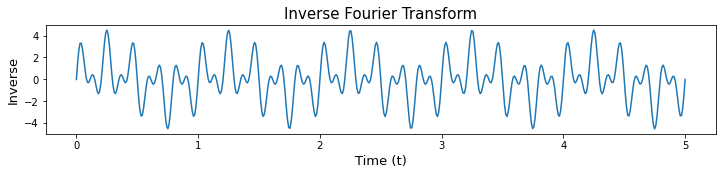

In [7]:
#The inverse functions takes in input the Fourier transformed array from our rfft function
inverse=np.fft.irfft(power) #Notice the i in irfft
print(inverse.shape) #Turns out to be 500, same as the number of data samples that we started with

#Let's plot it against time
plt.figure(figsize=(12,2))
plt.plot(t,inverse)
plt.title("Inverse Fourier Transform",size=15)
plt.xlabel("Time (t)",size=13)
plt.ylabel("Inverse",size=13)
plt.show()

Looks the same as the one we had before!<br><br>
In <a href="https://en.wikipedia.org/wiki/Radio_astronomy">radio astronomy</a>, we usually obtain radio data from the astronomical sources in terms of the voltages measured across the electrodes of a radio antenna. As you know that in a real setting every signal is accompanied with some noise. It's our job to filter out the signal from the noise. So let's try doing. First, make some noise!

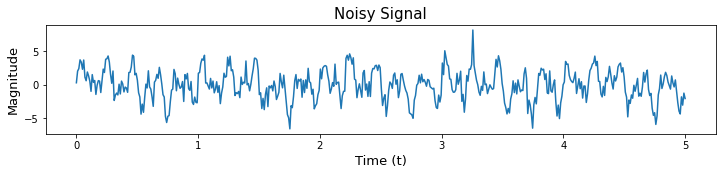

In [8]:
y_real=y+np.random.randn(500)
plt.figure(figsize=(12,2))
plt.plot(t,y_real)
plt.title("Noisy Signal",size=15)
plt.xlabel("Time (t)",size=13)
plt.ylabel("Magnitude",size=13)
plt.show()

You can see the difference between the original signal and now the noisy signal. We obtain the power spectrum using FFT.

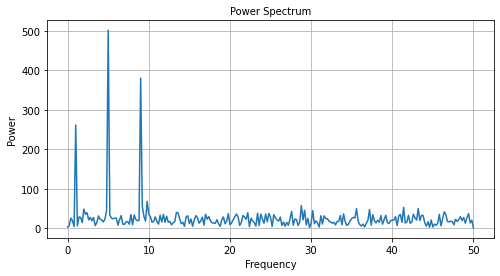

In [9]:
power=np.fft.rfft(y_real)
freq=np.fft.rfftfreq(len(y),0.01)
plt.figure(figsize=(8,4))
plt.plot(freq,np.abs(power))
plt.xlabel("Frequency",size=10)
plt.ylabel("Power",size=10)
plt.title("Power Spectrum",size=10)
plt.grid()
plt.show()

You can see the difference between the two power spectra, the one we obtained for a noise-free signal before and the one we obtained just for a noisy signal. There are tiny contributions from almost all other frequencies (due to random noise). If there was more noise, the difference between the actual frequency spikes and noisy spikes would decrease thus making the filtration process difficult. To remove the noise we need to set the contribution of all other frequencies to zero.

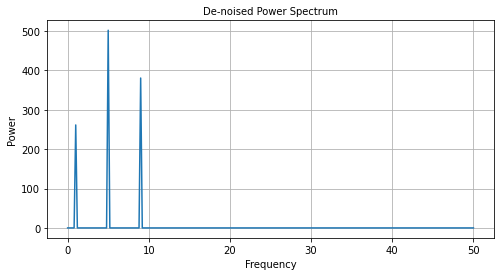

In [10]:
indices=np.where(np.abs(power)<200) #Gives the indices where the power is less than 200
power[indices]=0 #Set the power for all them to zero
plt.figure(figsize=(8,4))
plt.plot(freq,np.abs(power))
plt.xlabel("Frequency",size=10)
plt.ylabel("Power",size=10)
plt.title("De-noised Power Spectrum",size=10)
plt.grid()
plt.show()

Now we simply take the inverse Fourier transform.

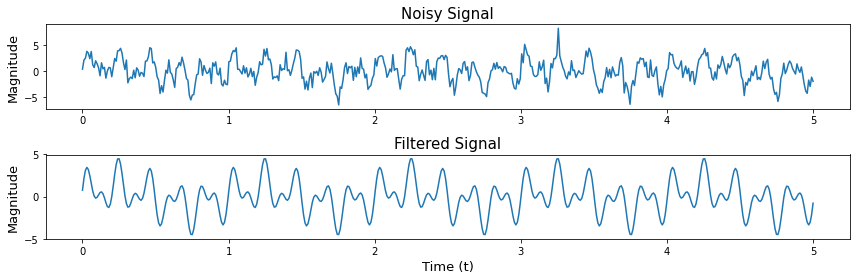

In [11]:
inverse=np.fft.irfft(power)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(t,y_real)
plt.title("Noisy Signal",size=15)
plt.ylabel("Magnitude",size=13)
plt.subplot(2,1,2)
plt.plot(t,inverse)
plt.title("Filtered Signal",size=15)
plt.xlabel("Time (t)",size=13)
plt.ylabel("Magnitude",size=13)
plt.yticks([-5,0,5])
plt.tight_layout()
plt.show()

##### Some fun
Given below is the code which converts a periodic signal into the corresponding audio signal. So the wave signals which we generated above can be actually felt through auditory senses. Let's hear the difference between a noisy signal and the filtered signal. You may have to install the `PyAudio` package. The documentation is available <a href="https://pypi.org/project/PyAudio/"> here</a>.

In [12]:
import pyaudio

p = pyaudio.PyAudio()

volume = 0.2     # range [0.0, 1.0]
fs = 44000      # sampling rate, Hz, must be integer
duration = 15  # in seconds, integer

f1 = 500.0       
f2 = 2000.0
f3 = 10000.0


# generate samples, note conversion to float32 array
T1=2*np.pi*np.arange(fs*duration)*f1/fs
T2=2*np.pi*np.arange(fs*duration)*f2/fs
T3=2*np.pi*np.arange(fs*duration)*f3/fs
y_noisy=1*np.sin(T1)-2*np.sin(T2)+1*np.sin(T3)+np.random.uniform(low=-1, high=1, size=(fs*duration,))

samples = y_noisy.astype(np.float32)

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(volume*samples)

stream.stop_stream()
stream.close()

p.terminate()

Now let's listen to the filtered signal. Here I am actually not carrying out filtration process since I already know the frequencies and I am lazy. I hope you will actually filter it.

In [13]:
p = pyaudio.PyAudio()
y_filtered=1*np.sin(T1)-2*np.sin(T2)+1*np.sin(T3)
samples = y_filtered.astype(np.float32)

# for paFloat32 sample values must be in range [-1.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)

# play. May repeat with different volume values (if done interactively) 
stream.write(volume*samples)

stream.stop_stream()
stream.close()

p.terminate()

## Lomb-Scargle Periodogram
The Fourier transform techniques that we saw above dependent on the sampling rate which is defined for observations made uniformly over a certain period of time. In Astronomy, several times it happens that the period is long enough that uniform observations cannot be made even within the period time. In such a case the Fourier transform techniques fail and we have to resort to other methods. One such method is the use of <a href="https://en.wikipedia.org/wiki/Periodogram">Periodograms</a> which are estimations of the power spectrum of Fourier transforms. The periodogram that we will use is the <a href="https://docs.astropy.org/en/stable/timeseries/lombscargle.html"> Lomb-Scargle periodogram</a> offered by `astropy.timeseries`

In [25]:
from astropy.timeseries import LombScargle

Generate a test periodic signal with unequal data spacing.

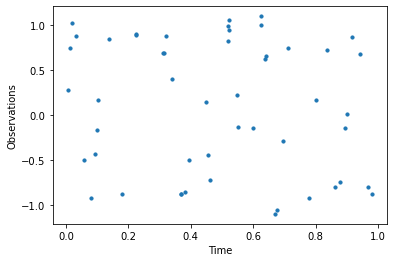

In [41]:
t = np.linspace(0,1,50)
t=np.random.random(50)
f=10
y=np.sin(2*np.pi*f*t) + 0.1*np.random.randn(len(t)) #Generates data with some noise
plt.scatter(t,y,s=10)
plt.xlabel("Time")
plt.ylabel("Observations")
plt.show()

That's a nasty plot, probably because the frequency is a bit high so you do not see the sine wave. Let's clean up such stuff.

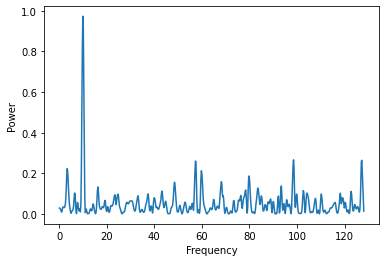

In [42]:
#Now we use the periodogram, notice the syntax
frequency,power=LombScargle(t,y).autopower()
plt.plot(frequency, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

There's a pretty nice peak! It must be the frequency which we were looking for.

In [43]:
#np.argmax gives the index of the maximum value
print(frequency[np.argmax(power)]) #Prints the frequency corresponding to the maximum power

9.948155809095347


That's pretty close to the value $f=10$ which we had used. The data was unequally spaced and had some noise, thus this seems to be a pretty good estimate. The `autopower` function provides more features. Suppose if you have an estimate of the frequency range, you can feed it into the function for a better output in several cases where the periodogram might detect some vastly different frequency. 

9.922798750892543


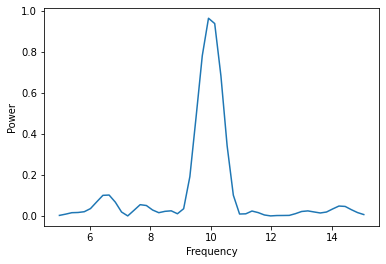

In [44]:
frequency, power = LombScargle(t,y).autopower(minimum_frequency=5, maximum_frequency=15) #We give the range in which the expected frequency lies
print(frequency[np.argmax(power)])
plt.plot(frequency, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

To see the sine wave structure of the observations, we employ a method called phase-folding. Basically, we take a starting point and from there we assign each time stamp a phase value according to the time period. Like if we start from $t=0$ and the time period is $T=2$, then $t=1$ would be assigned the phase $0.5$. Thus, it can be seen that phase is the decimal part of $(t-t_o)/P$. Phase folding brings out the structure or shape of the periodic variation.

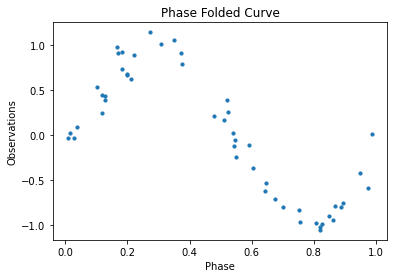

In [19]:
period=1/frequency[np.argmax(power)]
#phase=(t/period)-(t//period)
phase = np.remainder(t,period)/period #Either of the two expressions for phase works
plt.scatter(phase,y,s=10)
plt.xlabel("Phase")
plt.ylabel("Observations")
plt.title("Phase Folded Curve")
plt.show()

You may compare the two observations plots. The phase folded curve clearly shows the shape of variation, a sinusoidal variation in this case.

## Cepheid Variables
<a href="https://en.wikipedia.org/wiki/Cepheid_variable">Cepheid variables</a> are stars which brigthen and dim periodically. Cepheids are reasonably abundant and very bright. Astronomers can identify them not only in our Galaxy, but in other nearby galaxies as well. The periodic variation in brightness is very regular and does not change with time. Cepheids are prominently used to measure astronomical distances. If one requires the distance to a given galaxy one first locates the Cepheid variables in this galaxy. From these observations one determines the period of each of these stars.<br><br>
We will take some light curve data of a Cepheid and try to determine its period. To extract the data, we will use the <a href="http://ogledb.astrouw.edu.pl/~ogle/OCVS/ceph_query.php"> OGLE</a> database. You will land up on the query page, select the pulsation mode $F$ and then submit query. You may explore other query fields as well. On submitting the query, you'll see a table of Cepheid variables. You're free to choose any of those, I'm taking the first entry `OGLE-LMC-CEP-0002`. On the clicking the respective ID you'll land up on the page for that Cepheid. Data such as RA/Dec, measured period etc has been given on the webpage. Also, phase folded light curve can be seen. Below that plot, there's a hyperlink for I-band. Click on that to go on a page containing three columns of data, namely time, I magnitude and error in I magnitude. Press Ctrl+S and save the file as a `.dat` file. After that you may proceed with the code below:

In [20]:
time, I_mag, e_I_mag = np.genfromtxt("OGLE-LMC-CEP-0002.dat", unpack=True)

Let's visualize the observed data.

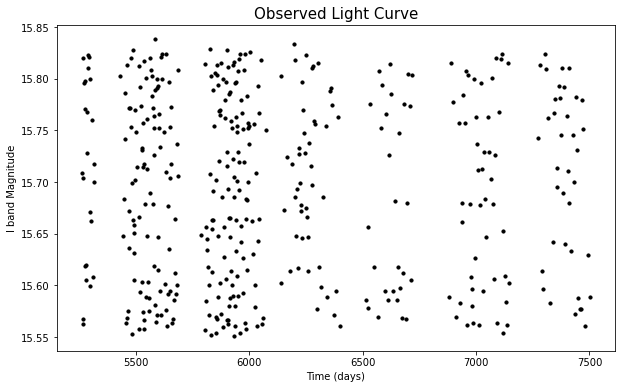

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(time, I_mag,c='k', s=10)
plt.xlabel("Time (days)")
plt.ylabel("I band Magnitude")
plt.title("Observed Light Curve",size=15)
plt.show()

It is hard to infer anything from the plot. We want to know the shape of variation. For that we need to phase fold the data but for phase folding we will have to determine the period of variation. So let's do that.

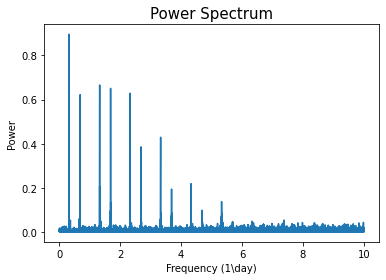

In [22]:
#Gave a rough range for the frequency, also LombScargle accepts the error values in daat as well, here e_I_mag
frequency, power = LombScargle(time, I_mag, e_I_mag).autopower(minimum_frequency=0.001, maximum_frequency=10)

plt.plot(frequency, power)
plt.xlabel('Frequency (1\day)')
plt.ylabel('Power')
plt.title("Power Spectrum", size=15)
plt.show()

You can see peaks occuring in integer multiples. It is simply due to higher harmonics that is the cepheid might not be a fundamental oscillator and there is some other periodicity. 

In [23]:
period=1/frequency[np.argmax(power)]
print(period)

3.118497667089408


This value of period closely matches the one given on OGLE webpage for the given Cepheid (P_1 value on the webpage). Now use this to phase fold the observed data.

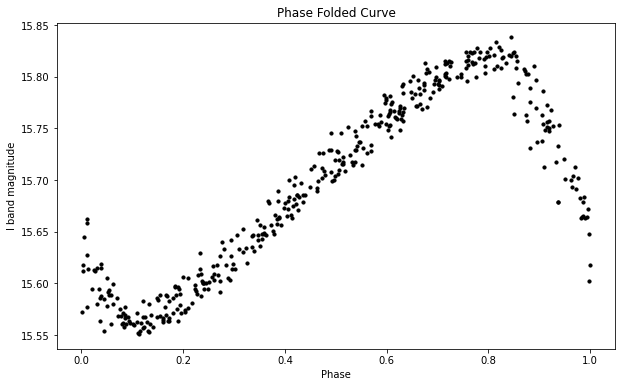

In [24]:
phase = np.remainder(time,period)/period
plt.figure(figsize=(10,6))
plt.scatter(phase,I_mag,c='k',s=10)
plt.xlabel("Phase")
plt.ylabel("I band magnitude")
plt.title("Phase Folded Curve")
plt.show()

The shape of variation exactly matches as shown on the webpage. This is certainly not pure sinusoidal. Let the researchers find that out. You may play with the data for other Cepheid variables available.